In [2]:
from pathlib import Path
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [3]:
import torch
import numpy as np

C:\Users\bzimka\Anaconda3\envs\torchedu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import abbyy_course_cvdl_t2

In [5]:
from abbyy_course_cvdl_t2.impl.train import train
from abbyy_course_cvdl_t2.impl.data import CocoTextDetection, CocoDetectionPrepareTransform

In [6]:
import abbyy_course_cvdl_t2
TINY_COCO_BASE = Path(abbyy_course_cvdl_t2.__file__).parent.parent / 'data'
TINY_COCO_BASE.exists()

True

In [7]:
from torchvision.datasets import CocoDetection

Если CocoDetection падает, вероятно, вам нужно установить pycocotools: `pip install pycocotools`

Раньше pycocotools требовал предварительную установки cython:
`pip install cython`
Раньше установка на windows работала криво: https://stackoverflow.com/questions/52920222/could-not-install-pycocotools-in-windows-fatal-error-c1083-cannot-open-include

На новых версиях python на windows теперь работает ок.

In [8]:
def draw_boxes(image_np, yc_t, xc_t, hy_t, wx_t, color=(0, 255, 0), thick=1):
    img = np.array(image_np)
    num_boxes = len(yc_t)
    val = np.array(color)
    for idx in range(num_boxes):
        yc = yc_t[idx]
        xc = xc_t[idx]
        hy = hy_t[idx]
        wx = wx_t[idx]
        img[
                yc - hy//2 - thick : yc - hy//2 + thick, 
                xc - wx//2 : xc + wx//2, 
        ] = val
        img[
                yc + hy//2 - thick : yc + hy//2 + thick, 
                xc - wx//2 : xc + wx//2, 
        ] = val

        img[
                yc - hy//2 : yc + hy//2, 
                (xc - wx//2 - thick): (xc - wx//2 + thick), 
        ] = val
        img[
                yc - hy//2 : yc + hy//2, 
                xc + wx//2 - thick: xc + wx//2 + thick, 
        ] = val
    return img
        
        

In [10]:
from abbyy_course_cvdl_t2.impl.data import CocoTextDetection

In [12]:
ds_text = CocoTextDetection(
    Path("D:\\data\\COCO\\train2014"),
    Path("D:\\data\\COCO\\Coco_Text\\cocotext.v2.json"),
    transforms=CocoDetectionPrepareTransform(size=(256,256), ids_map = {1: 0, 0:0}
),
    area_fraction_threshold=1/32/32
)

In [13]:
x, y = ds_text[6]

In [14]:
y[:10]

tensor([[133.8933,  60.5600,  12.5333,  13.4400,   0.0000,   1.0000],
        [131.5200, 156.7800,  11.5200,  19.8800,   0.0000,   1.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000]])

C:\Users\bzimka\AppData\Local\Temp\ipykernel_17652\4024544524.py:11: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  yc - hy//2 - thick : yc - hy//2 + thick,
C:\Users\bzimka\AppData\Local\Temp\ipykernel_17652\4024544524.py:12: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  xc - wx//2 : xc + wx//2,
C:\Users\bzimka\AppData\Local\Temp\ipyke

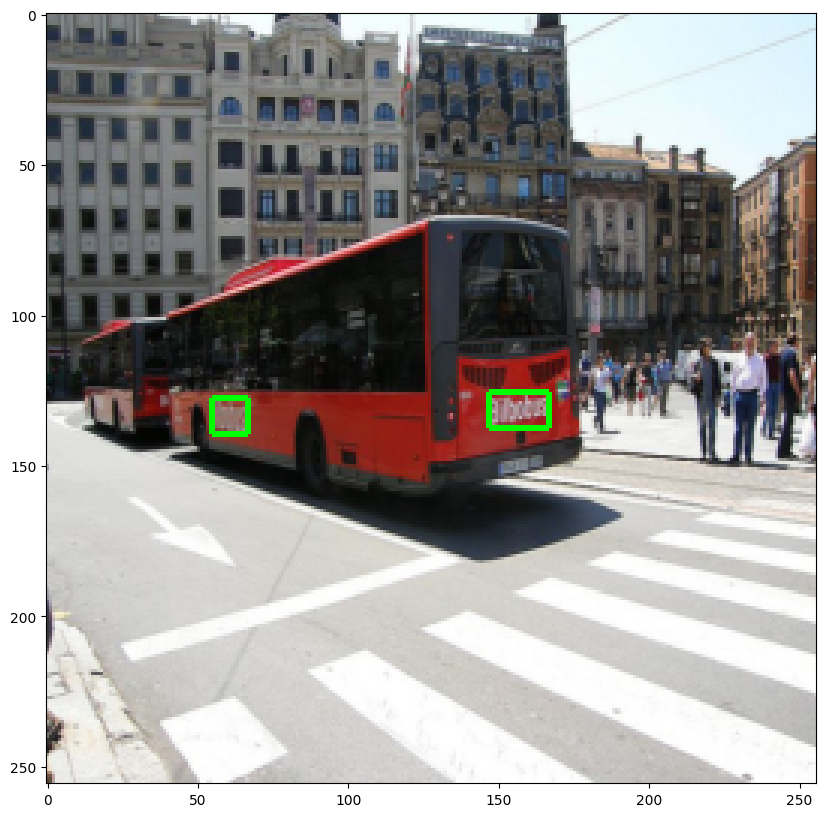

In [15]:
rnd = lambda x: torch.round(x).long()

plt.imshow(draw_boxes(
    x.permute(1, 2, 0).numpy(), rnd(y[:, 0]), rnd(y[:, 1]), rnd(y[:, 2]), rnd(y[:, 3]) 
))
#plt.imshow(x.permute(1, 2, 0))

In [ ]:
net = CenterNet(head_kwargs={'c_classes': 1}, nms_kwargs={'kernel_size': 5})
crit = CenterNetLoss(obj_to_points=ObjectsToPoints(num_classes=1))

In [85]:
net = train(ds_text, net=net, criterion=crit, batch_size=64, epochs=100, device=torch.device('cuda:0'), lr=1e-3)

epoch 0|0; total loss:20.03006362915039
last losses: [503.065185546875, 37.104393005371094, 60.73227310180664]
epoch 0|30; total loss:419.9407653808594
last losses: [214.11915588378906, 51.18642807006836, 81.9703140258789]
epoch 0|60; total loss:295.9126892089844
last losses: [137.73707580566406, 45.98878860473633, 58.56794738769531]
epoch 0|90; total loss:212.50393676757812
last losses: [79.93269348144531, 50.081016540527344, 62.380470275878906]
epoch 0|120; total loss:150.6932373046875
last losses: [47.01905822753906, 32.64099884033203, 26.45724868774414]
epoch 0|150; total loss:121.8314437866211
last losses: [26.461040496826172, 51.93741226196289, 42.371986389160156]
epoch 0|180; total loss:101.900390625
last losses: [14.675792694091797, 45.86402893066406, 47.29771041870117]
epoch 0|210; total loss:96.74049377441406
last losses: [10.189334869384766, 32.5323486328125, 35.52465057373047]
epoch 0|240; total loss:93.07405853271484
last losses: [6.194277286529541, 49.47068405151367, 39.7

In [86]:
with torch.no_grad():
    yp_heat = net(x[None].to('cuda:0')).cpu()    
    yp = net(x[None].to('cuda:0'), return_objects=True).cpu()

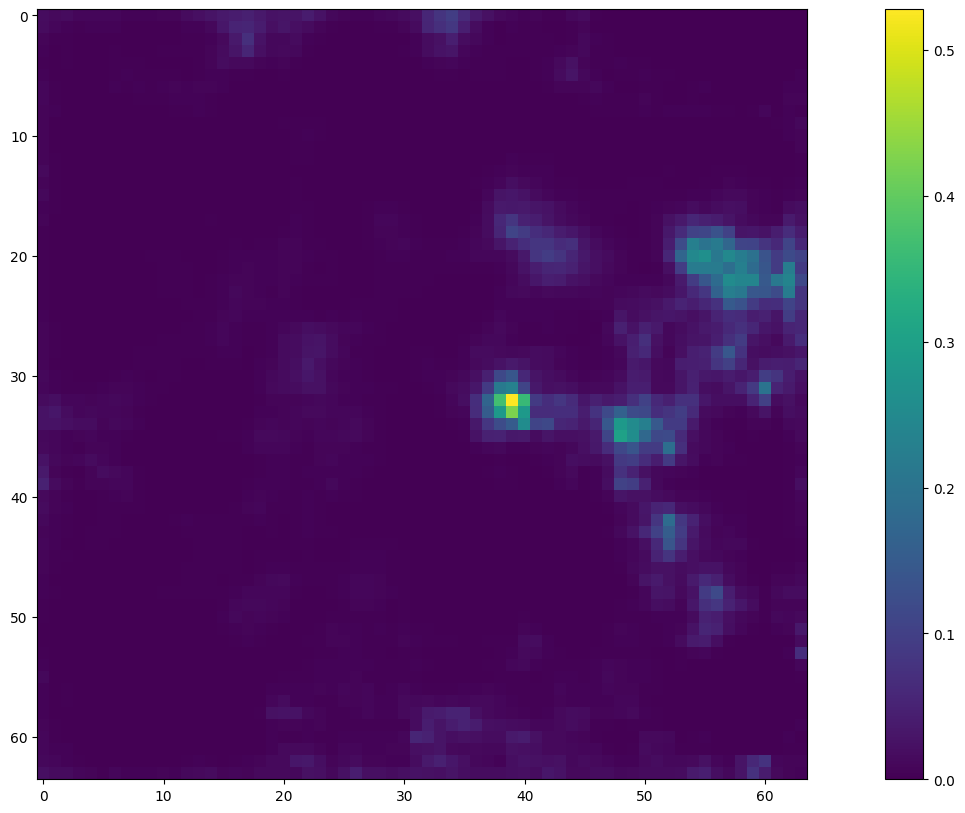

In [87]:
plt.imshow(yp_heat[0, 0])
plt.colorbar()

In [88]:
yp[0][:20]

tensor([[1.3111e+02, 1.5675e+02, 1.0120e+01, 1.8249e+01, 0.0000e+00, 5.2782e-01],
        [1.4132e+02, 1.9481e+02, 2.1549e+01, 1.3805e+01, 0.0000e+00, 3.0174e-01],
        [8.1188e+01, 2.2182e+02, 2.2830e+01, 8.2835e+00, 0.0000e+00, 2.6358e-01],
        [8.9690e+01, 2.4964e+02, 4.0306e+01, 6.8298e+00, 0.0000e+00, 2.3754e-01],
        [1.2542e+02, 2.4016e+02, 1.7798e+01, 8.0252e+00, 0.0000e+00, 2.0198e-01],
        [1.7054e+02, 2.0902e+02, 1.0980e+01, 7.2681e+01, 0.0000e+00, 1.8581e-01],
        [1.1561e+02, 2.3111e+02, 1.7594e+01, 1.1555e+01, 0.0000e+00, 1.4258e-01],
        [1.9384e+02, 2.2553e+02, 2.3352e+01, 6.3674e+01, 0.0000e+00, 1.1565e-01],
        [7.5157e+01, 1.5736e+02, 1.6345e+01, 9.4072e+00, 0.0000e+00, 1.0743e-01],
        [1.5914e+02, 1.9474e+02, 1.0818e+01, 2.5602e+01, 0.0000e+00, 1.0443e-01],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e

In [89]:
y[:6]

tensor([[133.8933,  60.5600,  12.5333,  13.4400,   0.0000,   1.0000],
        [131.5200, 156.7800,  11.5200,  19.8800,   0.0000,   1.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000]])

C:\Users\bzimka\AppData\Local\Temp\ipykernel_22236\4024544524.py:11: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  yc - hy//2 - thick : yc - hy//2 + thick,
C:\Users\bzimka\AppData\Local\Temp\ipykernel_22236\4024544524.py:12: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  xc - wx//2 : xc + wx//2,
C:\Users\bzimka\AppData\Local\Temp\ipyke

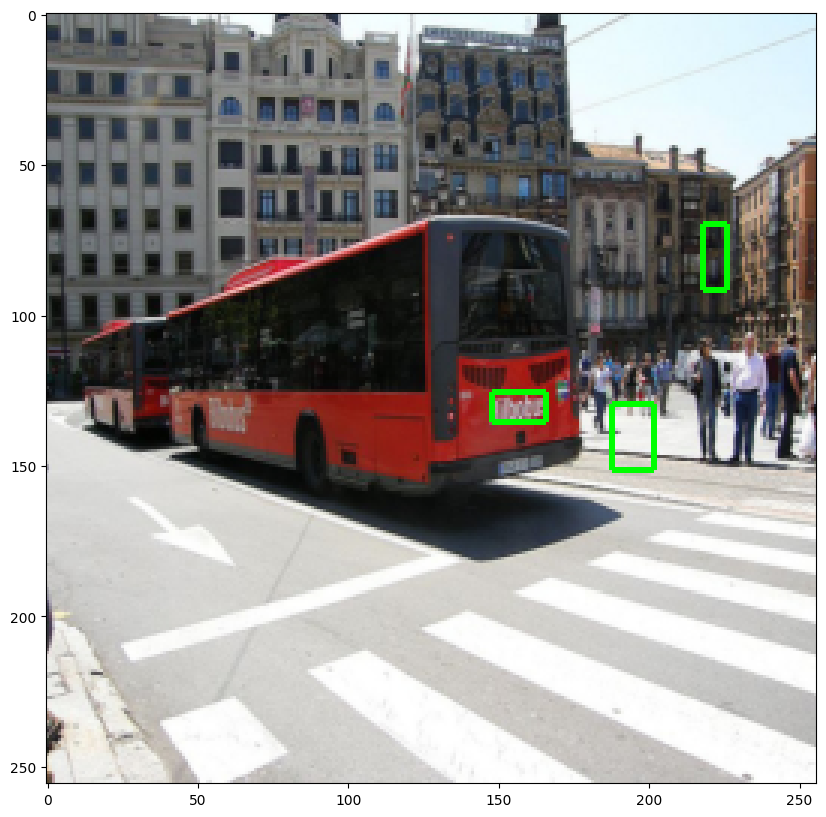

In [93]:
rnd = lambda x: torch.round(x).long()

plt.imshow(draw_boxes(
    x.permute(1, 2, 0).numpy(), rnd(yp[0, :3, 0]), rnd(yp[0, :3, 1]), rnd(yp[0, :3, 2]), rnd(yp[0, :3, 3]) 
));